<a href="https://colab.research.google.com/github/Jiipengentobat/DIF62130_B_25_2311532004/blob/main/Praktikum5/ReduksiDimensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menampilkan jumlah sampel dan fitur dari dataset Iris menggunakan Scikit-learn

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris['data']
y =iris['target']

n_samples, n_features = x.shape

print('Number of samples', n_samples)
print('Number of features', n_features)


Number of samples 150
Number of features 4


Visualisasi hubungan antar fitur pada dataset Iris menggunakan scatter plot dan histogram.

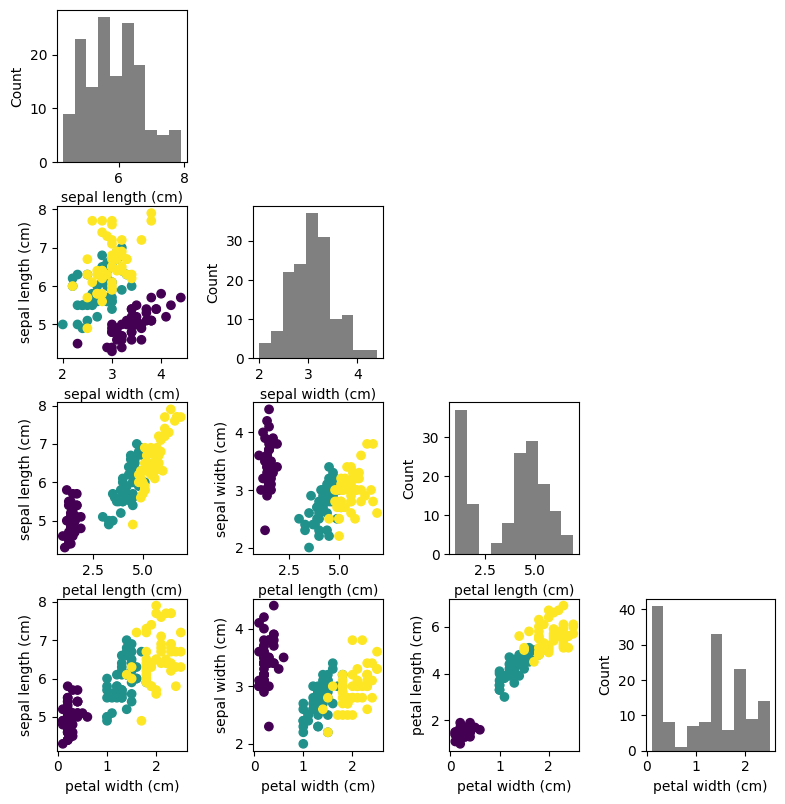

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip (*np.triu_indices(n_features, k=1)):
    ax[j, i].scatter(x[:, j], x[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(x[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])

Standarisasi data dan perhitungan matriks kovarian untuk analisis komponen utama (PCA).

In [57]:
def mean(x):
  return sum(x)/len(x)

def std(x):
  return (sum((i - mean(x))**2 for i in x) / (len(x) - 1))**0.5

def Standardize_data(x):
  return (x - mean(x))/std(x)

def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

x_std = Standardize_data(x)

cov_mat = covariance(x_std)

Menampilkan matriks kovarian dari data yang telah distandarisasi.

In [60]:
cov_mat

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Melakukan dekomposisi eigen pada matriks kovarian untuk memperoleh eigenvalue dan eigenvector, sebagai dasar dalam PCA

In [64]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs [max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs [np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


Menyusun pasangan eigenvalue dan eigenvector, lalu mengurutkannya berdasarkan besar eigenvalue untuk keperluan reduksi dimensi.

In [75]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9184978165319966), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.9140304714680703), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.1467568755713152), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020714836428619345), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


Mengambil 2 eigenvector teratas sebagai basis proyeksi untuk reduksi dimensi PCA

In [77]:
k = 2
w =eig_vecs_sorted[:k, :]

print(w.shape)

(2, 4)


Menghitung dan memvisualisasikan persentase varian data yang dijelaskan oleh setiap komponen utama (PCA)

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


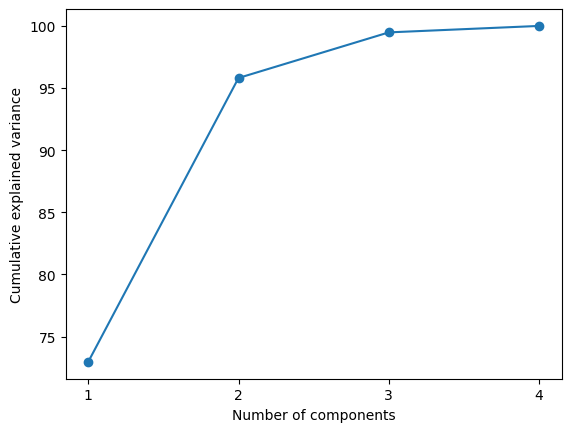

In [78]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

Memproyeksikan data ke ruang berdimensi lebih rendah menggunakan 2 komponen utama

In [79]:
x_proj = x_std.dot(w.T)

print(x_proj.shape)
print(x.shape)

(150, 2)
(150, 4)


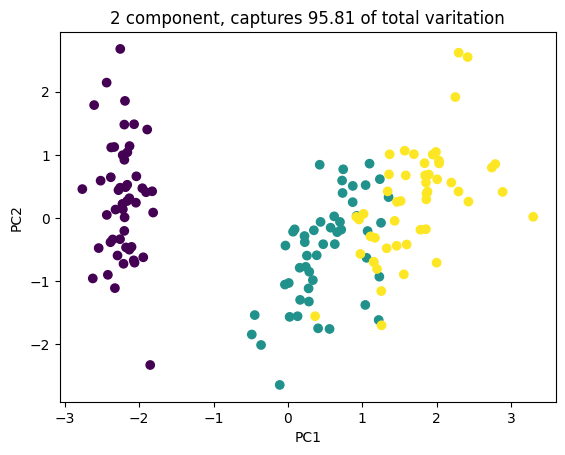

In [86]:
plt.scatter(x_proj[:,0], x_proj[:,1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 component, captures {} of total varitation'.format(cum_explained_variance[1]))
plt.show()